#  FORCASTING

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"C:\Users\Bhagya\Desktop\Apps\Desktop\BSW PDF\data set\Covid_19_Clean_Complete (2).csv")

In [3]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

### *province/state :* The specific state or province within a country.
### *country/region :* The name of the country where COVID-19 cases were reported.
### *Lat :* Latitude of the country.
### *long :* Longitude of the country .
### *Date:* Date on which the data was recorded.
### *Confirmed :* The number of confirmed COVID-19  cases .
### *Deaths :* The number of people who recovered from COVID-19.
### *Recovered:* The number of people who recovered from COVID-19.
### *Active :* current active cases till that date.
### *WHO REGION :*The WHO ares that covers the specific country .

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [5]:
# Use rename fxn and rename the province/state column as state and country 

df.rename(columns={
    'Province/State' : 'State',
    'Country/Region' : 'Country'
},inplace=True)

In [6]:
df

State                Country        Lat       Long        Date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [7]:
# get the count of all the dates in date column.
# also find min and max date.


In [8]:
df['Date'].value_counts()

Date
2020-01-22    261
2020-01-23    261
2020-01-24    261
2020-01-25    261
2020-01-26    261
             ... 
2020-07-23    261
2020-07-24    261
2020-07-25    261
2020-07-26    261
2020-07-27    261
Name: count, Length: 188, dtype: int64

In [9]:
df['Date'].min()

'2020-01-22'

In [10]:
df['Date'].max()

'2020-07-27'

In [11]:
# select all the confirmed cases with respect to date and store it in a new data frame 
confirmed_cases= df.groupby(['Date'])['Confirmed'].sum().reset_index()
confirmed_cases

Date  Confirmed
0    2020-01-22        555
1    2020-01-23        654
2    2020-01-24        941
3    2020-01-25       1434
4    2020-01-26       2118
..          ...        ...
183  2020-07-23   15510481
184  2020-07-24   15791645
185  2020-07-25   16047190
186  2020-07-26   16251796
187  2020-07-27   16480485

[188 rows x 2 columns]

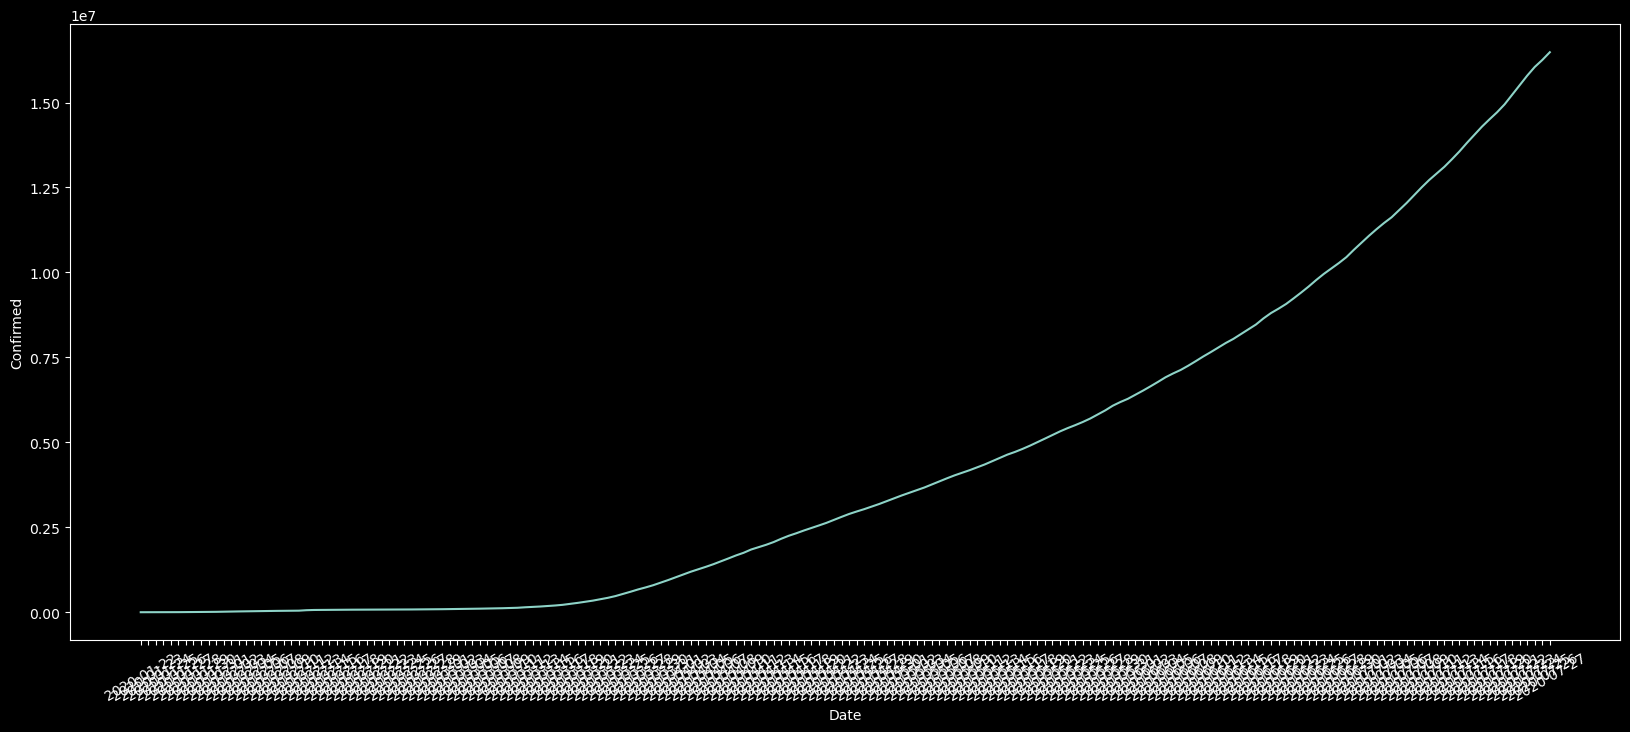

In [12]:
# create a line plot for this new data frame
# IN x store Dates
# IN y store confirmed cases
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=confirmed_cases, x='Date',y='Confirmed')
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.xticks(rotation=30)
plt.show()

In [13]:
# plot the data  for Deathsc, Recovered ,  Active
# first crate a dataframe and than plot the graph

In [14]:
new_df=df.groupby(['Date'])[['Deaths','Recovered','Active']].sum().reset_index()
new_df


Date  Deaths  Recovered   Active
0    2020-01-22      17         28      510
1    2020-01-23      18         30      606
2    2020-01-24      26         36      879
3    2020-01-25      42         39     1353
4    2020-01-26      56         52     2010
..          ...     ...        ...      ...
183  2020-07-23  633506    8710969  6166006
184  2020-07-24  639650    8939705  6212290
185  2020-07-25  644517    9158743  6243930
186  2020-07-26  648621    9293464  6309711
187  2020-07-27  654036    9468087  6358362

[188 rows x 4 columns]

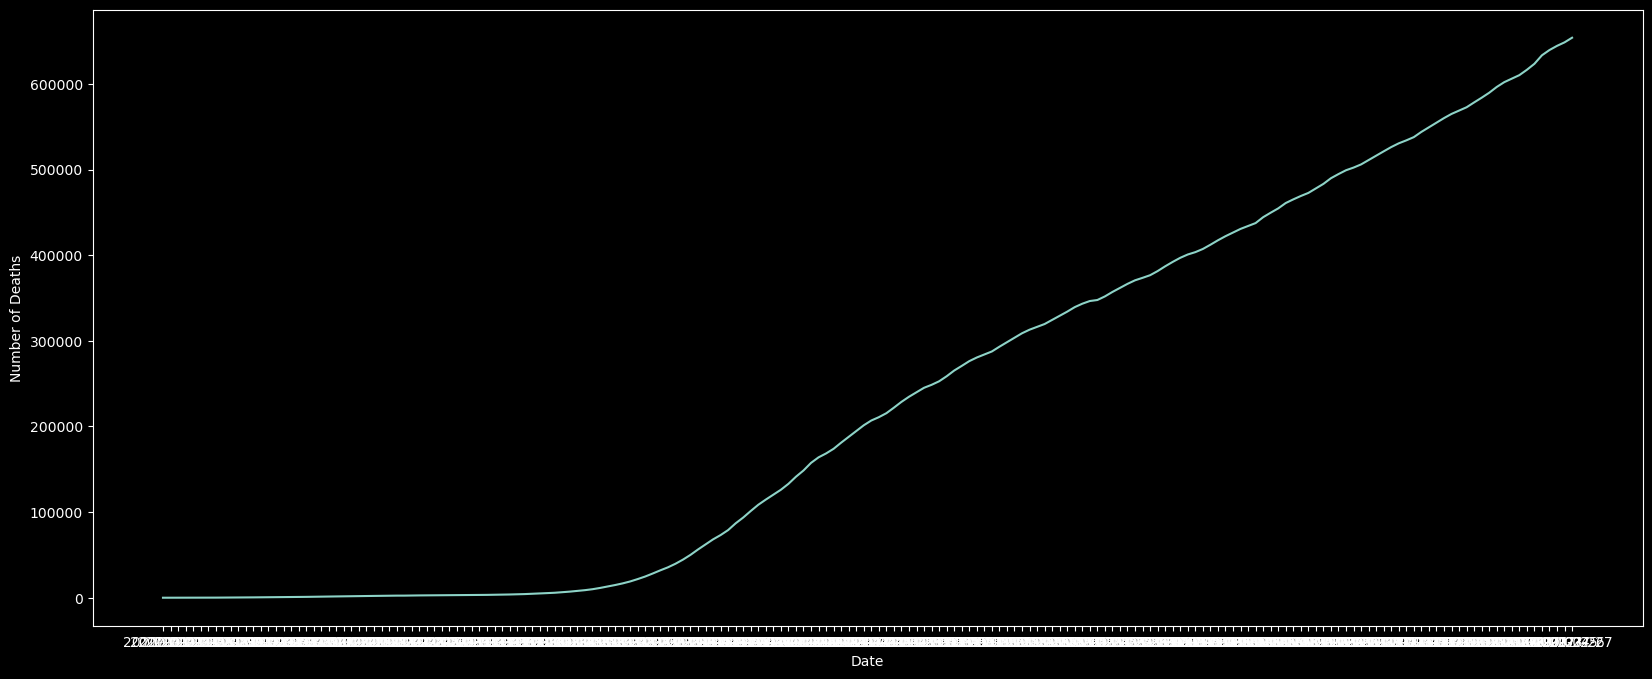

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
sns.lineplot(data=new_df, x='Date', y='Deaths')
plt.xlabel("Date")   
plt.ylabel("Number of Deaths")
plt.show()


In [16]:
# randomly select 3 countries INDIA , US , CHINA
# create 3 new data frame for all these countries,
# and then select confirmed cases , active cases , deaths , recoverd with respect to date.


In [17]:
country_US = df[df['Country']=='US']
country_US

country_INDIA = df[df['Country']=='India']

country_CHINA = df[df['Country']=='China']

In [18]:
 country_US  = country_US.groupby(['Date'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
country_INDIA  = country_INDIA.groupby(['Date'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
country_CHINA  = country_CHINA.groupby(['Date'])[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()

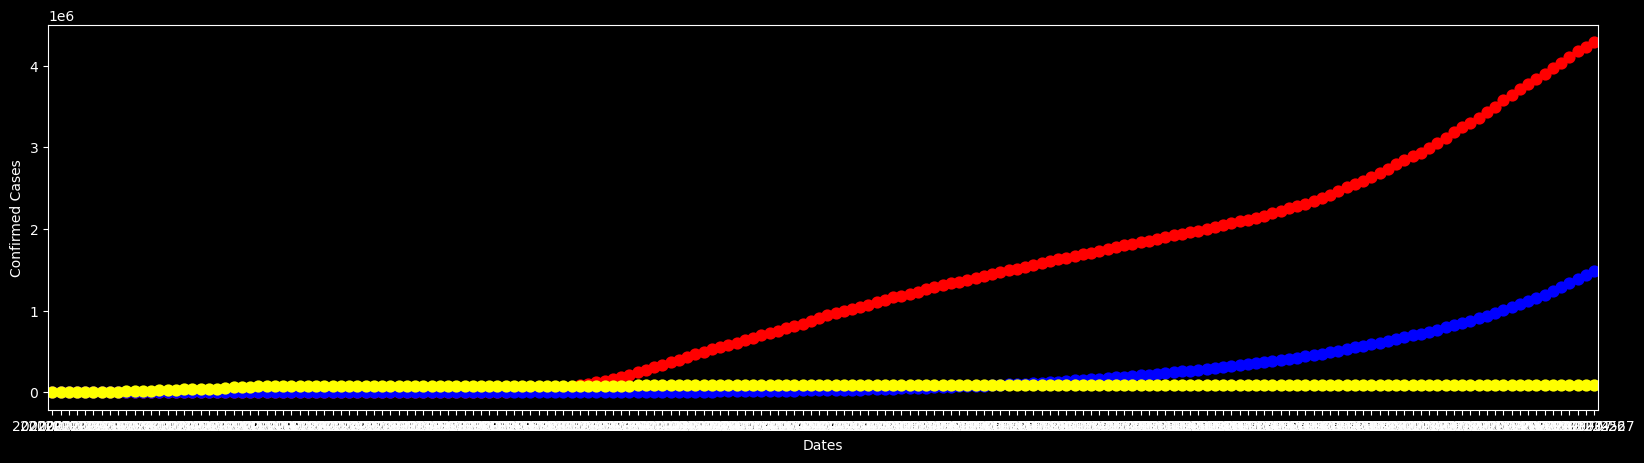

In [19]:
plt.figure(figsize=(20,5))

sns.pointplot(data=country_US,x='Date',y='Confirmed',color='Red')
sns.pointplot(data=country_INDIA,x='Date',y='Confirmed',color='Blue')
sns.pointplot(data=country_CHINA,x='Date',y='Confirmed',color='Yellow')

plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.show()

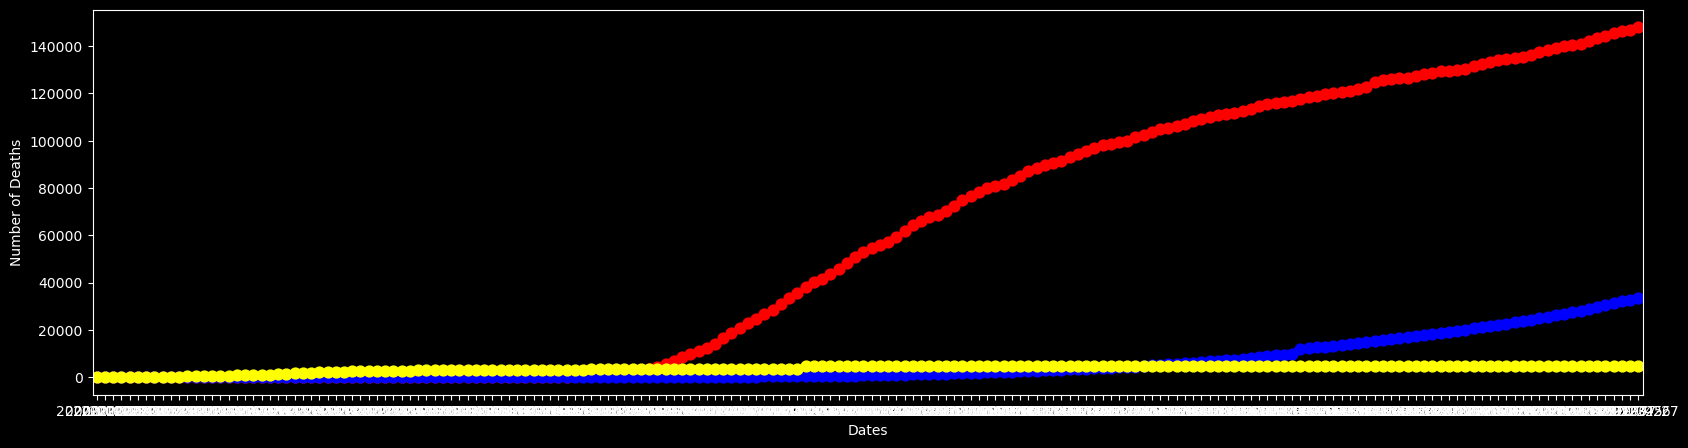

In [20]:
# create the plot for number of people died during covid 19 from these 3 countries 
plt.figure(figsize=(20,5))

sns.pointplot(data=country_US, x='Date',y='Deaths', color ='Red')
sns.pointplot(data=country_INDIA , x='Date', y='Deaths', color='Blue')
sns.pointplot(data=country_CHINA, x='Date', y='Deaths', color='Yellow')

plt.xlabel('Dates')
plt.ylabel('Number of Deaths')
plt.show()

## Model Building

### '''Facebook Prophet is a time Series forcasting tool developed via Facebook that's designed to be easy to use and 
### effective for a wide range of time series data . It's particularly useful for data that has strong seasonal effects 
### (like daily or weekly patterns ) and inclueds important dates or events that can impact and forecast.'''


In [22]:
# y(t) = g(t) + s(t) + h(t) + E(t)
# g(t) = Trend 
# s(t) = Seasonality 
# h(t) = Holiday/Events
# E(t) = Error team

In [23]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 892.5 kB/s eta 0:00:15
   -- ------------------------------------- 0.8/13.3 MB 1.1 MB/s eta 0:00:12
   --- ------------------------------------ 1.3/13.3 MB 1.4 MB/s eta 0:00:09
   ------ --------------------------------- 2.1/13.3 MB 1.8 MB/s eta 0:00:07
   ------- -------------------------------- 2.4/13.3 MB 1.9 MB/s eta 0:00:06
   ------- -------------------------------- 2.6/13.3 MB 1.8 MB/s eta 0:00:07
   -------- ------------------------------- 2.9/13.3 MB 1.6 MB/s eta 0:00:07
   --------- ------------------------------ 3.1/13.3 MB 1.6 MB/s eta 0:00:07
   ---------- ----------------------------- 3.4/13.3 MB 1.6 MB/s eta 0:00:07
   ----------- ---------------------------- 3.9/13.3 MB 1.6 MB/s eta 0:00:06
   ------------- -

In [31]:
from prophet import Prophet # (use to import in google colab)
# it takes two columns
# ds: date 
# y : Target variables

In [32]:
# The column names must be ds and y (It's madatory)
confirmed_cases.columns=['ds','y']

In [33]:
confirmed_cases

ds         y
0    2020-01-22       555
1    2020-01-23       654
2    2020-01-24       941
3    2020-01-25      1434
4    2020-01-26      2118
..          ...       ...
183  2020-07-23  15510481
184  2020-07-24  15791645
185  2020-07-25  16047190
186  2020-07-26  16251796
187  2020-07-27  16480485

[188 rows x 2 columns]

In [35]:
model=Prophet()

In [36]:
model.fit(confirmed_cases)

20:44:45 - cmdstanpy - INFO - Chain [1] start processing
20:44:55 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
future_pred=model.make_future_dataframe(periods=7) #passing weekly data (period = 7)  

In [41]:
forecasted = model.predict(future_pred)

In [44]:
forecasted

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22 -9.356186e+03 -1.306807e+05  8.257885e+04 -9.356186e+03   
1   2020-01-23 -6.667734e+03 -1.157649e+05  9.300757e+04 -6.667734e+03   
2   2020-01-24 -3.979282e+03 -9.895386e+04  1.133471e+05 -3.979282e+03   
3   2020-01-25 -1.290830e+03 -9.540654e+04  1.182215e+05 -1.290830e+03   
4   2020-01-26  1.397622e+03 -9.155006e+04  1.238796e+05  1.397622e+03   
..         ...           ...           ...           ...           ...   
190 2020-07-30  1.674928e+07  1.663707e+07  1.685021e+07  1.674235e+07   
191 2020-07-31  1.695352e+07  1.685589e+07  1.707361e+07  1.694095e+07   
192 2020-08-01  1.715776e+07  1.706150e+07  1.727678e+07  1.713667e+07   
193 2020-08-02  1.736200e+07  1.726003e+07  1.748332e+07  1.732891e+07   
194 2020-08-03  1.756624e+07  1.744662e+07  1.766860e+07  1.752383e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -9.356186e+03   -10986.210444         -10986.210444         -10986.210444   
1   -6.667734e+03    -1078.891654          -1078.891654          -1078.891654   
2   -3.979282e+03    10103.249373          10103.249373          10103.249373   
3   -1.290830e+03    13670.214198          13670.214198          13670.214198   
4    1.397622e+03     7218.144397           7218.144397           7218.144397   
..            ...             ...                   ...                   ...   
190  1.675357e+07    -1078.891654          -1078.891654          -1078.891654   
191  1.696392e+07    10103.249373          10103.249373          10103.249373   
192  1.717701e+07    13670.214198          13670.214198          13670.214198   
193  1.739311e+07     7218.144397           7218.144397           7218.144397   
194  1.760991e+07    -2144.375427          -2144.375427          -2144.375427   

           weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -10986.210444 -10986.210444 -10986.210444                   0.0   
1    -1078.891654  -1078.891654  -1078.891654                   0.0   
2    10103.249373  10103.249373  10103.249373                   0.0   
3    13670.214198  13670.214198  13670.214198                   0.0   
4     7218.144397   7218.144397   7218.144397                   0.0   
..            ...           ...           ...                   ...   
190  -1078.891654  -1078.891654  -1078.891654                   0.0   
191  10103.249373  10103.249373  10103.249373                   0.0   
192  13670.214198  13670.214198  13670.214198                   0.0   
193   7218.144397   7218.144397   7218.144397                   0.0   
194  -2144.375427  -2144.375427  -2144.375427                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -2.034240e+04  
1                           0.0                         0.0 -7.746625e+03  
2                           0.0                         0.0  6.123967e+03  
3                           0.0                         0.0  1.237938e+04  
4                           0.0                         0.0  8.615766e+03  
..                          ...                         ...           ...  
190                         0.0                         0.0  1.674820e+07  
191                         0.0                         0.0  1.696362e+07  
192                         0.0                         0.0  1.717143e+07  
193                         0.0                         0.0  1.736922e+07  
194                         0.0                         0.0  1.756410e+07  

[195 rows x 16 columns]

In [47]:
# ds: This column contains the dates for which prediction have been made . It stands for "date stamps"
# yhat : This contains all the predicted values (forecast) for the given data is ds column
#        It represents model's best estimate for that point in time  
# yhat_upper: This column represents the upper bound of the predicted values ,
#             which indicates the higher end of the confidence interval .
#             It suggests that the actual value is unikely to exceed this amount,
#             giving you an idea of the prediction's uncertainity .
# yhat_lower: This column represents that lower bound of predicted value 
#             It suggests that the actual values is unlikely to be lower than this amount.
# exp;  yhat=250
#       yhat_upper=265
#       yhat_lower=230

In [49]:
forecasted[['yhat_lower','yhat','yhat_upper']]

yhat_lower          yhat    yhat_upper
0   -1.306807e+05 -2.034240e+04  8.257885e+04
1   -1.157649e+05 -7.746625e+03  9.300757e+04
2   -9.895386e+04  6.123967e+03  1.133471e+05
3   -9.540654e+04  1.237938e+04  1.182215e+05
4   -9.155006e+04  8.615766e+03  1.238796e+05
..            ...           ...           ...
190  1.663707e+07  1.674820e+07  1.685021e+07
191  1.685589e+07  1.696362e+07  1.707361e+07
192  1.706150e+07  1.717143e+07  1.727678e+07
193  1.726003e+07  1.736922e+07  1.748332e+07
194  1.744662e+07  1.756410e+07  1.766860e+07

[195 rows x 3 columns]

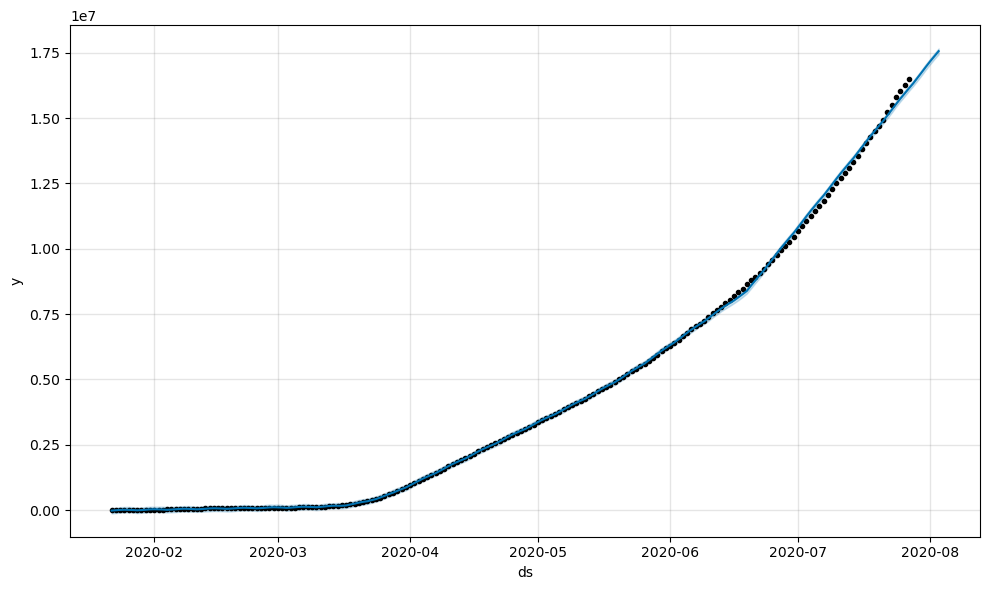

In [50]:
with plt.style.context('default'):
    model.plot(forecasted)
    plt.show()

In [51]:
import plotly
import plotly.express as px

In [56]:
world=df.groupby(['Country'])[['Confirmed','Deaths','Active','Recovered']].sum().reset_index()

In [57]:
world

Country  Confirmed  Deaths   Active  Recovered
0           Afghanistan    1936390   49098  1089052     798240
1               Albania     196702    5708    72117     118877
2               Algeria    1179755   77972   345886     755897
3               Andorra      94404    5423    19907      69074
4                Angola      22662    1078    15011       6573
..                  ...        ...     ...      ...        ...
182  West Bank and Gaza     233461    1370   170967      61124
183      Western Sahara        901      63      190        648
184               Yemen      67180   17707    25694      23779
185              Zambia     129421    2643    43167      83611
186            Zimbabwe      50794     881    37706      12207

[187 rows x 5 columns]

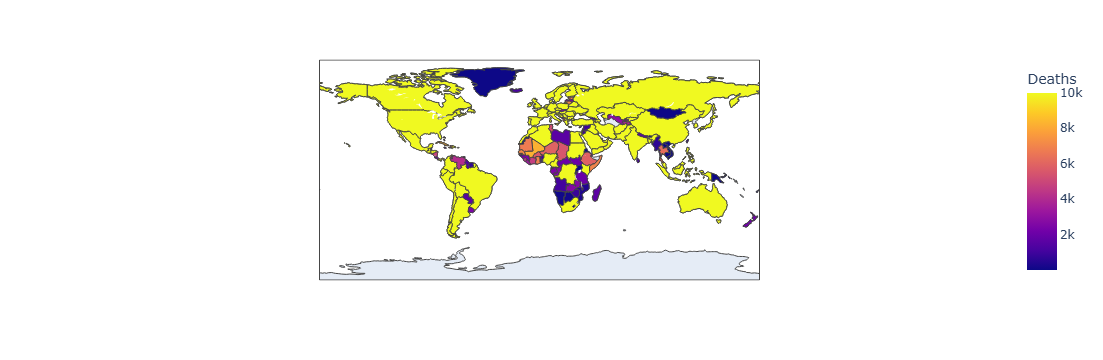

In [63]:
figure=px.choropleth(world,
       locations='Country',
       locationmode='country names',
        color='Deaths', hover_name='Country', range_color=[1,10000])
figure.show()

In [64]:
#Importing plotly express to create interactive visualizations

In [65]:
import plotly.express as px

In [66]:
# creating a choropleth mapp to show the number of deaths per country 

In [70]:
figure = px.choropleth(world,  #This is our DataFrame that contains the data
        locations='Country',   #We are using the 'country' column to find locations 
        locationmode='country names', # we are using full country names instead of country codes like 'IND' OR 'USA'
        color='Deaths',   # This column determines how dark or light eah country appears (based on number of deaths)
        hover_name='Country',  # When we hover over a country , its name will be show 
        range_color=[1,100000] # We are setting the color scale range , -15000 as the lightest , 100000 as the darkest
)

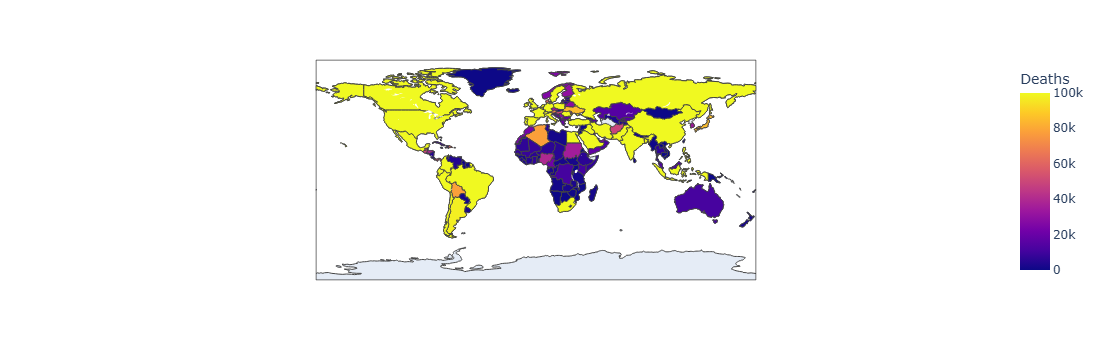

In [71]:
#Displaying the interactive map
figure.show()

21:48:42 - cmdstanpy - INFO - Chain [1] start processing
21:48:42 - cmdstanpy - INFO - Chain [1] done processing


            ds     yhat_lower           yhat     yhat_upper
185 2020-07-25  636635.204956  638705.430601  640804.110873
186 2020-07-26  640941.146523  642843.435001  644707.843583
187 2020-07-27  645031.053818  647134.820163  648977.556407
188 2020-07-28  650605.452042  652342.857217  654480.886270
189 2020-07-29  655832.985837  657910.776693  659874.010565
190 2020-07-30  661429.726923  663521.743356  665580.843617
191 2020-07-31  666828.569036  669038.962960  671279.309050
192 2020-08-01  671515.136693  673922.465056  676355.583048
193 2020-08-02  675498.114225  678060.469456  680785.427955
194 2020-08-03  679413.691640  682351.854619  685426.608381


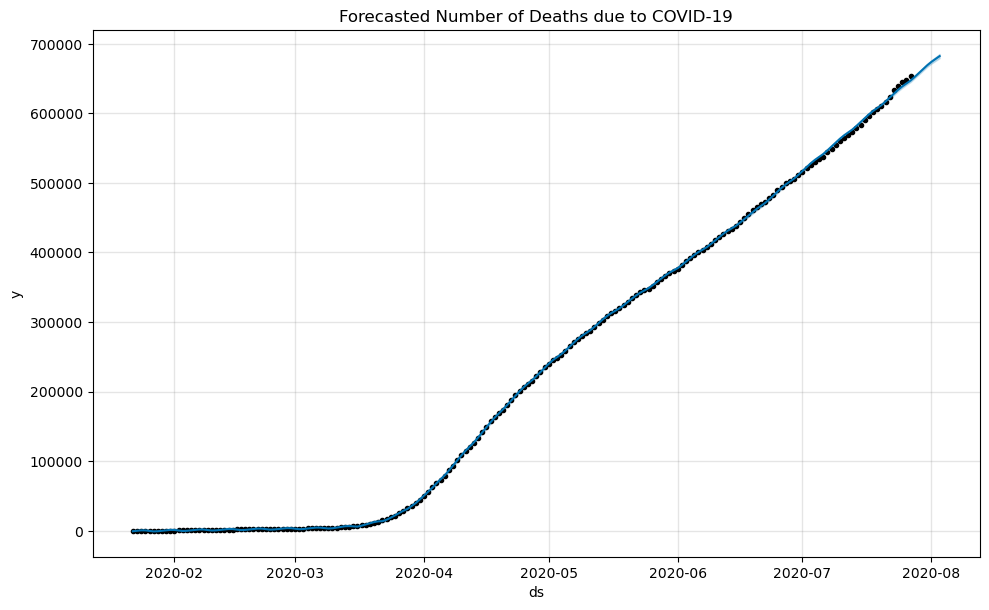

In [72]:
# --- Forecasting Deaths ---

# Step 1: Prepare data
deaths_cases = df.groupby(['Date'])['Deaths'].sum().reset_index()

# Prophet needs columns: 'ds' for date and 'y' for target
deaths_cases.columns = ['ds','y']

# Step 2: Build and fit the model
death_model = Prophet()
death_model.fit(deaths_cases)

# Step 3: Create future dataframe (7 days forecast, can increase)
future_death = death_model.make_future_dataframe(periods=7)
forecasted_death = death_model.predict(future_death)

# Step 4: Check forecasted results
print(forecasted_death[['ds','yhat_lower','yhat','yhat_upper']].tail(10))

# Step 5: Plot forecast
with plt.style.context('default'):
    death_model.plot(forecasted_death)
    plt.title("Forecasted Number of Deaths due to COVID-19")
    plt.show()


# Global Deaths Forecast (all countries combined)

## This will give you the worldwide deaths prediction.

21:50:32 - cmdstanpy - INFO - Chain [1] start processing
21:50:32 - cmdstanpy - INFO - Chain [1] done processing


            ds     yhat_lower           yhat     yhat_upper
208 2020-08-17  740463.151878  752785.923529  767876.027017
209 2020-08-18  744928.925738  757993.960583  773904.750822
210 2020-08-19  749339.706910  763561.880059  780777.194054
211 2020-08-20  753717.845285  769172.846721  787337.828555
212 2020-08-21  758501.512865  774690.066326  794216.274064
213 2020-08-22  761788.639863  779573.568422  800632.601712
214 2020-08-23  764701.257711  783711.572822  806427.927150
215 2020-08-24  768126.911113  788002.957984  811517.189855
216 2020-08-25  772913.901261  793210.995038  817666.873261
217 2020-08-26  777337.630726  798778.914514  824972.004450


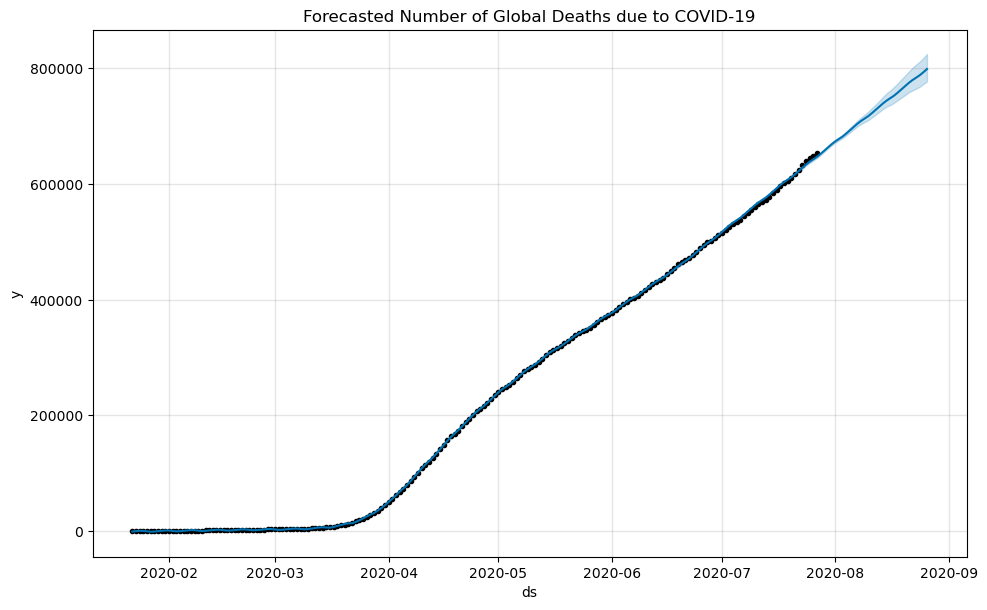

In [73]:
# --- Forecasting Global Deaths ---

# Prepare data
deaths_cases = df.groupby(['Date'])['Deaths'].sum().reset_index()
deaths_cases.columns = ['ds','y']

# Build and fit Prophet model
death_model = Prophet()
death_model.fit(deaths_cases)

# Forecast for next 30 days (you can change)
future_death = death_model.make_future_dataframe(periods=30)
forecasted_death = death_model.predict(future_death)

# Show forecasted results
print(forecasted_death[['ds','yhat_lower','yhat','yhat_upper']].tail(10))

# Plot forecast
with plt.style.context('default'):
    death_model.plot(forecasted_death)
    plt.title("Forecasted Number of Global Deaths due to COVID-19")
    plt.show()


# Per-Country Deaths Forecast (India, US, China)

## You can loop through countries to avoid repeating code:

21:51:32 - cmdstanpy - INFO - Chain [1] start processing
21:51:32 - cmdstanpy - INFO - Chain [1] done processing


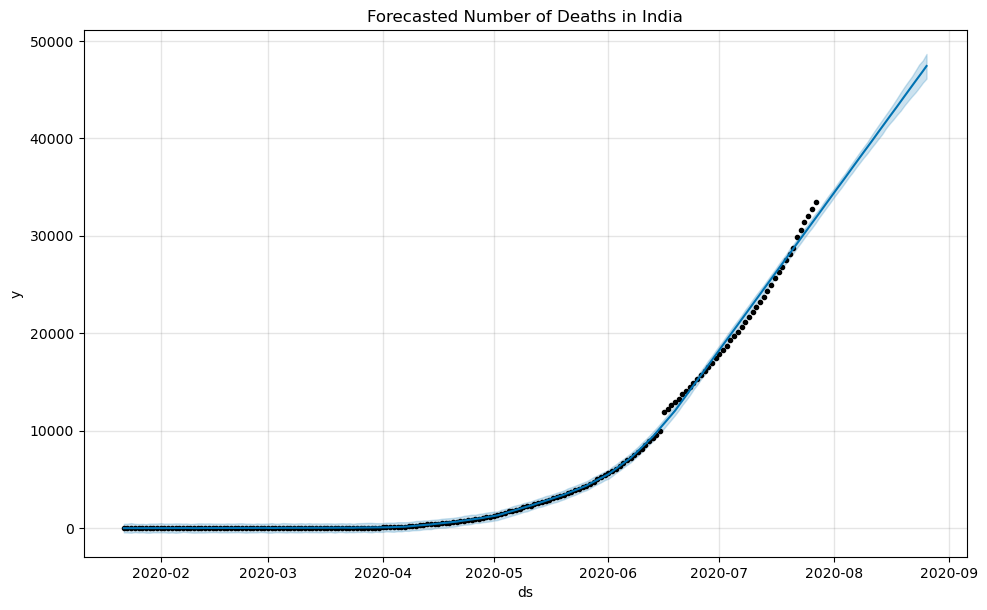

21:51:32 - cmdstanpy - INFO - Chain [1] start processing
21:51:33 - cmdstanpy - INFO - Chain [1] done processing


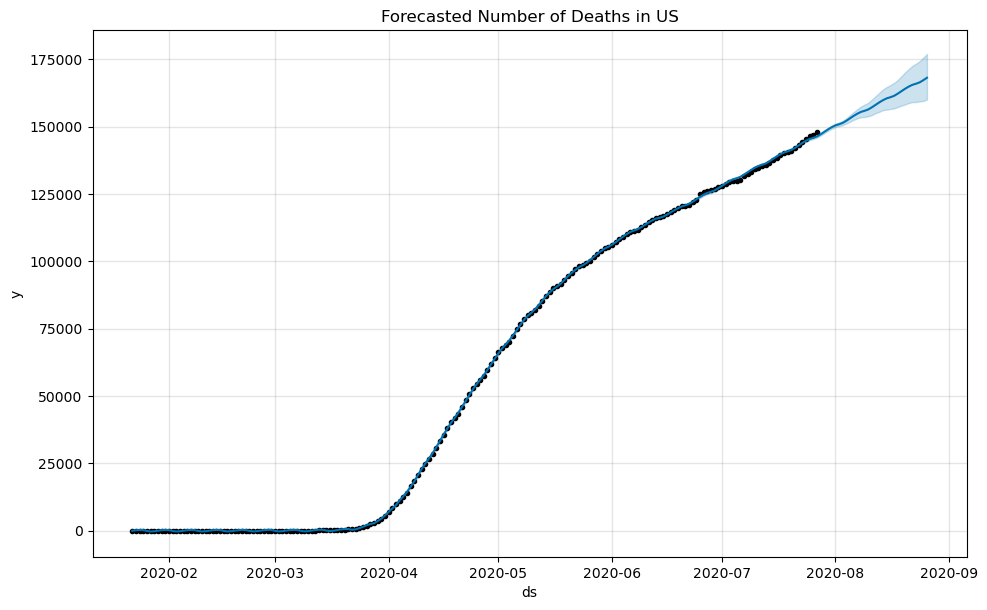

21:51:33 - cmdstanpy - INFO - Chain [1] start processing
21:51:34 - cmdstanpy - INFO - Chain [1] done processing


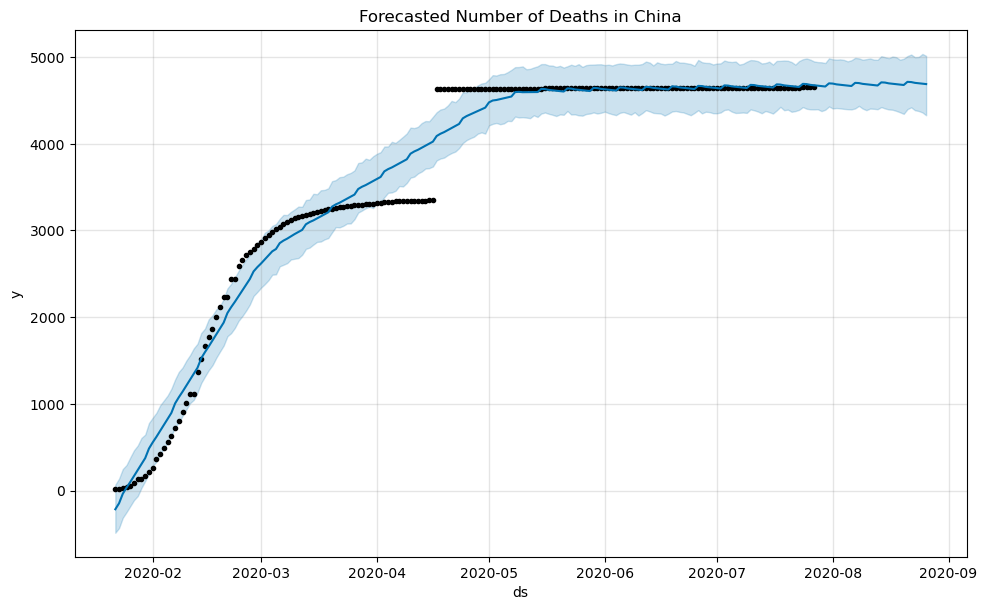

In [74]:
# --- Forecasting Deaths for Specific Countries ---
countries = ["India", "US", "China"]

for country in countries:
    country_df = df[df['Country'] == country]
    country_deaths = country_df.groupby(['Date'])['Deaths'].sum().reset_index()
    country_deaths.columns = ['ds','y']

    # Build and fit Prophet model
    model_country = Prophet()
    model_country.fit(country_deaths)

    # Forecast for next 30 days
    future_country = model_country.make_future_dataframe(periods=30)
    forecast_country = model_country.predict(future_country)

    # Plot forecast
    with plt.style.context('default'):
        model_country.plot(forecast_country)
        plt.title(f"Forecasted Number of Deaths in {country}")
        plt.show()


# Global Deaths Forecast (Interactive Plotly)

21:52:43 - cmdstanpy - INFO - Chain [1] start processing
21:52:43 - cmdstanpy - INFO - Chain [1] done processing


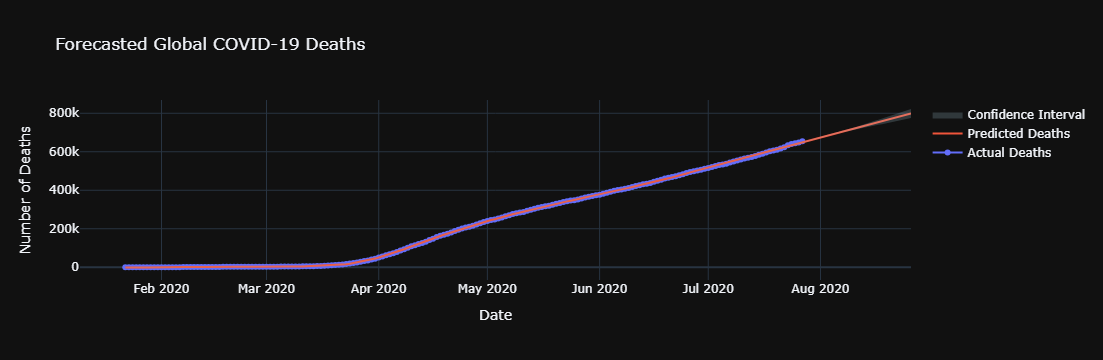

In [75]:
import plotly.graph_objs as go

# Prepare data
deaths_cases = df.groupby(['Date'])['Deaths'].sum().reset_index()
deaths_cases.columns = ['ds','y']

# Build and fit Prophet model
death_model = Prophet()
death_model.fit(deaths_cases)

# Forecast for next 30 days
future_death = death_model.make_future_dataframe(periods=30)
forecasted_death = death_model.predict(future_death)

# Plotly interactive plot
fig = go.Figure()

# Actual data
fig.add_trace(go.Scatter(
    x=deaths_cases['ds'], y=deaths_cases['y'],
    mode='lines+markers', name='Actual Deaths'
))

# Forecasted deaths
fig.add_trace(go.Scatter(
    x=forecasted_death['ds'], y=forecasted_death['yhat'],
    mode='lines', name='Predicted Deaths'
))

# Confidence interval (upper bound)
fig.add_trace(go.Scatter(
    x=forecasted_death['ds'], y=forecasted_death['yhat_upper'],
    mode='lines', line=dict(width=0), showlegend=False
))

# Confidence interval (lower bound)
fig.add_trace(go.Scatter(
    x=forecasted_death['ds'], y=forecasted_death['yhat_lower'],
    mode='lines', fill='tonexty', line=dict(width=0),
    fillcolor='rgba(173,216,230,0.2)', name='Confidence Interval'
))

fig.update_layout(
    title="Forecasted Global COVID-19 Deaths",
    xaxis_title="Date",
    yaxis_title="Number of Deaths",
    template="plotly_dark"
)

fig.show()


# Per-Country Deaths Forecast (India, US, China)

21:53:31 - cmdstanpy - INFO - Chain [1] start processing
21:53:31 - cmdstanpy - INFO - Chain [1] done processing


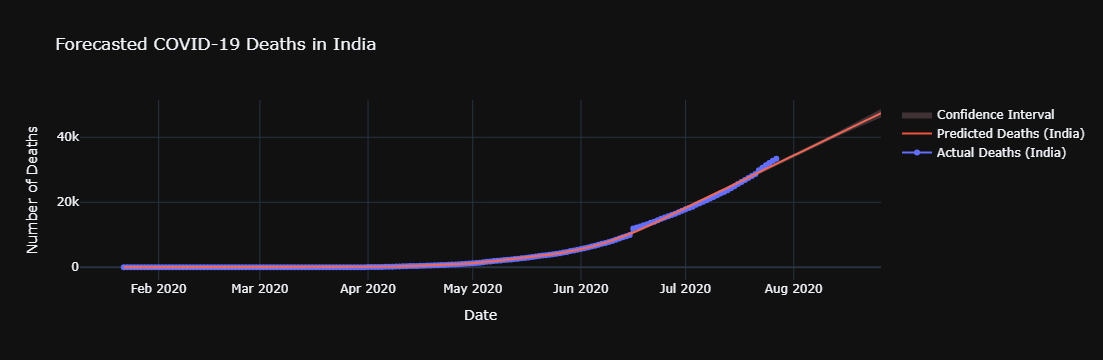

21:53:32 - cmdstanpy - INFO - Chain [1] start processing
21:53:32 - cmdstanpy - INFO - Chain [1] done processing


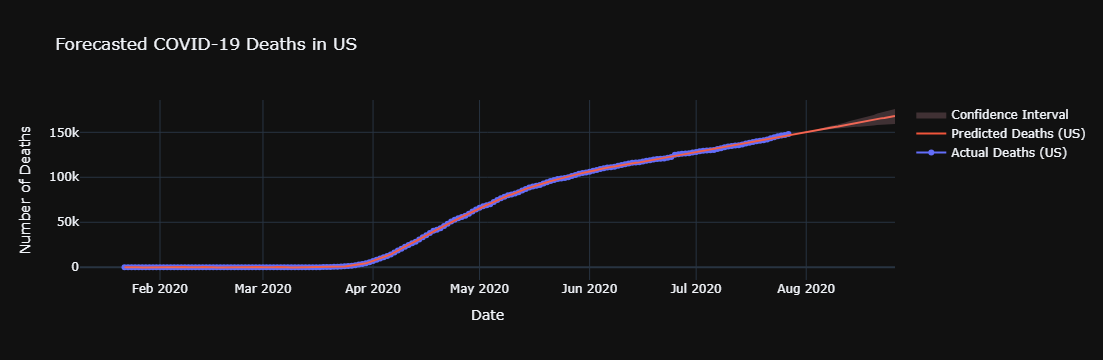

21:53:32 - cmdstanpy - INFO - Chain [1] start processing
21:53:32 - cmdstanpy - INFO - Chain [1] done processing


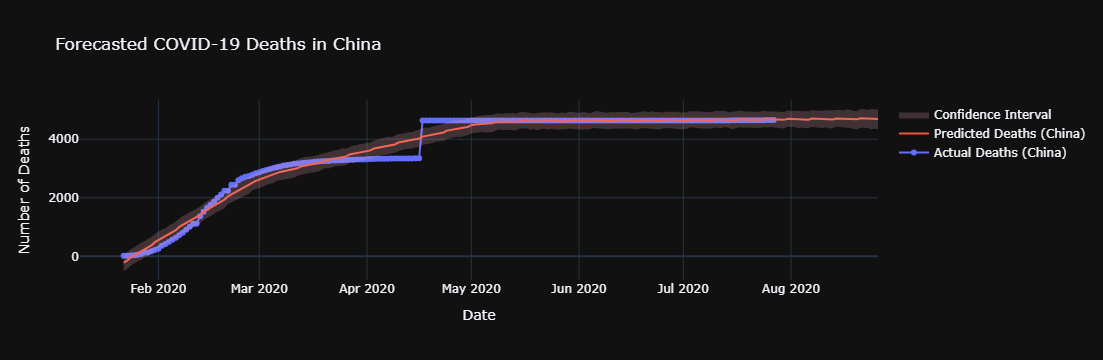

In [76]:
countries = ["India", "US", "China"]

for country in countries:
    country_df = df[df['Country'] == country]
    country_deaths = country_df.groupby(['Date'])['Deaths'].sum().reset_index()
    country_deaths.columns = ['ds','y']

    # Fit Prophet model
    model_country = Prophet()
    model_country.fit(country_deaths)

    # Forecast for 30 days
    future_country = model_country.make_future_dataframe(periods=30)
    forecast_country = model_country.predict(future_country)

    # Plotly forecast
    fig = go.Figure()

    # Actual deaths
    fig.add_trace(go.Scatter(
        x=country_deaths['ds'], y=country_deaths['y'],
        mode='lines+markers', name=f'Actual Deaths ({country})'
    ))

    # Predicted deaths
    fig.add_trace(go.Scatter(
        x=forecast_country['ds'], y=forecast_country['yhat'],
        mode='lines', name=f'Predicted Deaths ({country})'
    ))

    # Confidence interval
    fig.add_trace(go.Scatter(
        x=forecast_country['ds'], y=forecast_country['yhat_upper'],
        mode='lines', line=dict(width=0), showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=forecast_country['ds'], y=forecast_country['yhat_lower'],
        mode='lines', fill='tonexty', line=dict(width=0),
        fillcolor='rgba(255,182,193,0.2)', name='Confidence Interval'
    ))

    fig.update_layout(
        title=f"Forecasted COVID-19 Deaths in {country}",
        xaxis_title="Date",
        yaxis_title="Number of Deaths",
        template="plotly_dark"
    )

    fig.show()


# Generalized Function for Forecasting Deaths

In [78]:
import plotly.graph_objs as go
from prophet import Prophet

def forecast_deaths(df, country=None, periods=30):
    """
    Forecast COVID-19 deaths using Prophet.
    
    Parameters:
    - df: DataFrame with COVID data
    - country: str or None (if None, global forecast is made)
    - periods: int, number of future days to forecast
    
    Returns:
    - Interactive Plotly chart
    """
    
    # Filter data
    if country:
        data = df[df['Country'] == country]
        title = f"Forecasted COVID-19 Deaths in {country}"
    else:
        data = df.copy()
        title = "Forecasted Global COVID-19 Deaths"
    
    # Aggregate deaths by date
    deaths_cases = data.groupby(['Date'])['Deaths'].sum().reset_index()
    deaths_cases.columns = ['ds', 'y']
    
    # Fit Prophet model
    model = Prophet()
    model.fit(deaths_cases)
    
    # Make future predictions
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    
    # Plot with Plotly
    fig = go.Figure()
    
    # Actual data
    fig.add_trace(go.Scatter(
        x=deaths_cases['ds'], y=deaths_cases['y'],
        mode='lines+markers', name='Actual Deaths'
    ))
    
    # Forecast
    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['yhat'],
        mode='lines', name='Predicted Deaths'
    ))
    
    # Confidence interval
    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['yhat_upper'],
        mode='lines', line=dict(width=0), showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['yhat_lower'],
        mode='lines', fill='tonexty', line=dict(width=0),
        fillcolor='rgba(173,216,230,0.2)', name='Confidence Interval'
    ))
    
    fig.update_layout(
        title=title,
        xaxis_title="Date",
        yaxis_title="Number of Deaths",
        template="plotly_dark"
    )
    
    fig.show()
    return forecast


21:55:08 - cmdstanpy - INFO - Chain [1] start processing
21:55:08 - cmdstanpy - INFO - Chain [1] done processing


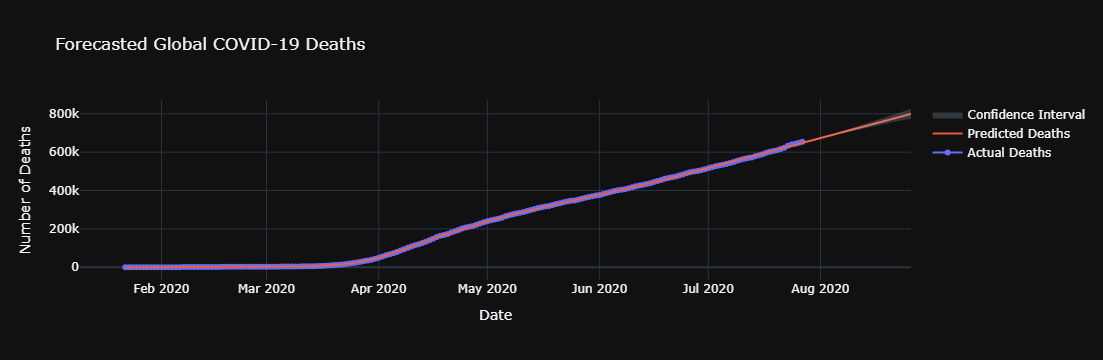

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0   2020-01-22    -521.770954   -2509.333390    1153.204807    -521.770954   
1   2020-01-23    -432.731822   -1951.241318    1991.063685    -432.731822   
2   2020-01-24    -343.692690   -1384.647981    2583.817583    -343.692690   
3   2020-01-25    -254.653558   -1495.331977    2232.347431    -254.653558   
4   2020-01-26    -165.614426   -2386.476980    1717.368473    -165.614426   
..         ...            ...            ...            ...            ...   
213 2020-08-22  778846.269625  760423.736362  801209.806210  759549.828318   
214 2020-08-23  783877.274547  763527.138611  806289.674512  763753.190975   
215 2020-08-24  788908.279469  766836.058563  811850.643551  767677.896426   
216 2020-08-25  793939.284391  771044.285052  818927.916356  771525.690432   
217 2020-08-26  798970.289313  773874.459542  825061.990515  775146.086132   

       trend_upper  additive_terms  additive_terms_lower  \
0      -521.770954     -191.374799           -191.374799   
1      -432.731822      388.586941            388.586941   
2      -343.692690      874.801623            874.801623   
3      -254.653558      727.298797            727.298797   
4      -165.614426     -165.701725           -165.701725   
..             ...             ...                   ...   
213  800126.002892      727.298797            727.298797   
214  806795.409043     -165.701725           -165.701725   
215  813360.528332     -905.321485           -905.321485   
216  819338.730416     -728.289353           -728.289353   
217  825693.286944     -191.374799           -191.374799   

     additive_terms_upper      weekly  weekly_lower  weekly_upper  \
0             -191.374799 -191.374799   -191.374799   -191.374799   
1              388.586941  388.586941    388.586941    388.586941   
2              874.801623  874.801623    874.801623    874.801623   
3              727.298797  727.298797    727.298797    727.298797   
4             -165.701725 -165.701725   -165.701725   -165.701725   
..                    ...         ...           ...           ...   
213            727.298797  727.298797    727.298797    727.298797   
214           -165.701725 -165.701725   -165.701725   -165.701725   
215           -905.321485 -905.321485   -905.321485   -905.321485   
216           -728.289353 -728.289353   -728.289353   -728.289353   
217           -191.374799 -191.374799   -191.374799   -191.374799   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
213                   0.0                         0.0   
214                   0.0                         0.0   
215                   0.0                         0.0   
216                   0.0                         0.0   
217                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
0                           0.0    -713.145753  
1                           0.0     -44.144881  
2                           0.0     531.108934  
3                           0.0     472.645240  
4                           0.0    -331.316151  
..                          ...            ...  
213                         0.0  779573.568422  
214                         0.0  783711.572822  
215                         0.0  788002.957984  
216                         0.0  793210.995038  
217                         0.0  798778.914514  

[218 rows x 16 columns]

In [79]:
#Global Forecast
forecast_deaths(df, country=None, periods=30)


21:55:37 - cmdstanpy - INFO - Chain [1] start processing
21:55:37 - cmdstanpy - INFO - Chain [1] done processing


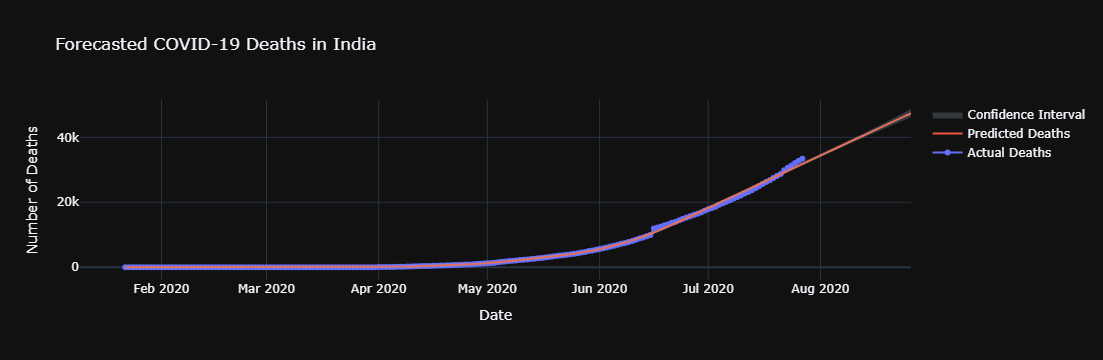

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22    -21.527948   -440.666110    440.504377    -21.527948   
1   2020-01-23    -20.836435   -492.622435    426.488936    -20.836435   
2   2020-01-24    -20.144921   -453.066608    470.442930    -20.144921   
3   2020-01-25    -19.453408   -469.650232    430.017123    -19.453408   
4   2020-01-26    -18.761894   -468.473964    429.742372    -18.761894   
..         ...           ...           ...           ...           ...   
213 2020-08-22  45320.124742  44327.676134  46387.954812  44378.538990   
214 2020-08-23  45840.387693  44764.974548  46953.414290  44832.213704   
215 2020-08-24  46360.650644  45185.478585  47495.165216  45282.791298   
216 2020-08-25  46880.913596  45651.292772  48108.469709  45748.272451   
217 2020-08-26  47401.176547  46184.731540  48722.543791  46219.798722   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0      -21.527948        2.140998              2.140998              2.140998   
1      -20.836435        1.664607              1.664607              1.664607   
2      -20.144921        6.902727              6.902727              6.902727   
3      -19.453408        6.224727              6.224727              6.224727   
4      -18.761894        2.316290              2.316290              2.316290   
..            ...             ...                   ...                   ...   
213  46258.904250        6.224727              6.224727              6.224727   
214  46844.718221        2.316290              2.316290              2.316290   
215  47449.261141       -8.323904             -8.323904             -8.323904   
216  48042.769004      -10.925446            -10.925446            -10.925446   
217  48622.536742        2.140998              2.140998              2.140998   

        weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0     2.140998      2.140998      2.140998                   0.0   
1     1.664607      1.664607      1.664607                   0.0   
2     6.902727      6.902727      6.902727                   0.0   
3     6.224727      6.224727      6.224727                   0.0   
4     2.316290      2.316290      2.316290                   0.0   
..         ...           ...           ...                   ...   
213   6.224727      6.224727      6.224727                   0.0   
214   2.316290      2.316290      2.316290                   0.0   
215  -8.323904     -8.323904     -8.323904                   0.0   
216 -10.925446    -10.925446    -10.925446                   0.0   
217   2.140998      2.140998      2.140998                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0    -19.386950  
1                           0.0                         0.0    -19.171828  
2                           0.0                         0.0    -13.242195  
3                           0.0                         0.0    -13.228681  
4                           0.0                         0.0    -16.445604  
..                          ...                         ...           ...  
213                         0.0                         0.0  45326.349469  
214                         0.0                         0.0  45842.703983  
215                         0.0                         0.0  46352.326741  
216                         0.0                         0.0  46869.988150  
217                         0.0                         0.0  47403.317545  

[218 rows x 16 columns]

In [80]:
# Forecast for One Country
forecast_deaths(df, country="India", periods=30)


21:56:33 - cmdstanpy - INFO - Chain [1] start processing
21:56:33 - cmdstanpy - INFO - Chain [1] done processing


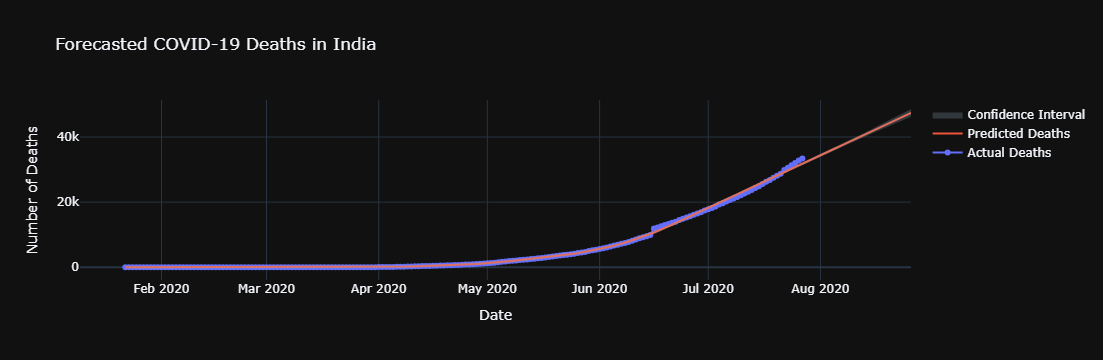

21:56:33 - cmdstanpy - INFO - Chain [1] start processing
21:56:33 - cmdstanpy - INFO - Chain [1] done processing


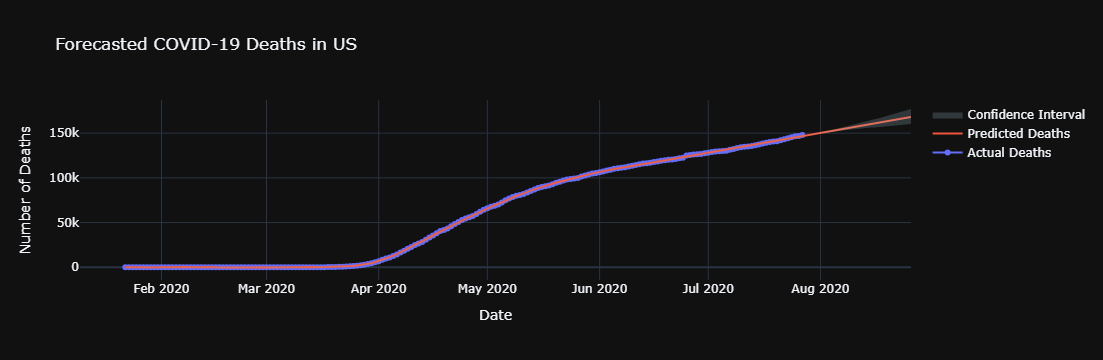

21:56:34 - cmdstanpy - INFO - Chain [1] start processing
21:56:34 - cmdstanpy - INFO - Chain [1] done processing


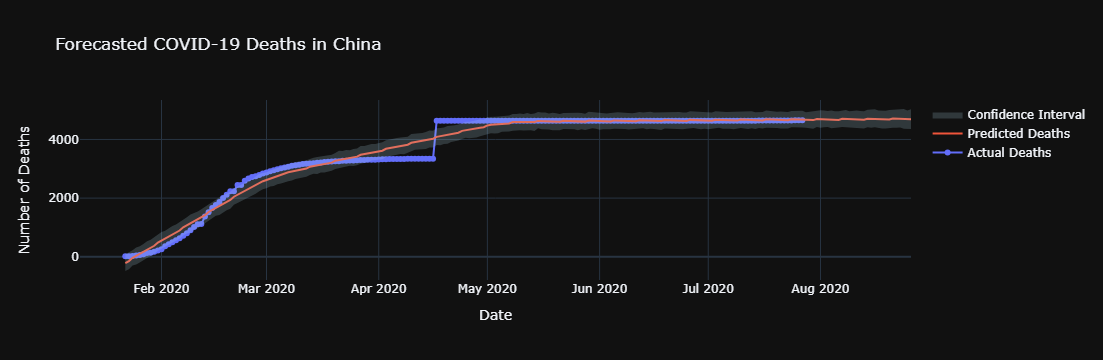

In [81]:
# Forecast for Multiple Countries
for c in ["India", "US", "China"]:
    forecast_deaths(df, country=c, periods=30)


# We’ll make a generalized function where you choose the column: "Confirmed", "Deaths", "Recovered", "Active".

In [83]:
import plotly.graph_objs as go
from prophet import Prophet

def forecast_covid(df, column="Deaths", country=None, periods=30):
    """
    Forecast COVID-19 metric using Prophet.
    
    Parameters:
    - df: DataFrame with COVID data
    - column: str, one of ["Confirmed", "Deaths", "Recovered", "Active"]
    - country: str or None (if None, global forecast is made)
    - periods: int, number of future days to forecast
    
    Returns:
    - Forecast DataFrame and interactive Plotly chart
    """
    
    # Filter for country/global
    if country:
        data = df[df['Country'] == country]
        title = f"Forecasted COVID-19 {column} in {country}"
    else:
        data = df.copy()
        title = f"Forecasted Global COVID-19 {column}"
    
    # Aggregate by date
    cases = data.groupby(['Date'])[column].sum().reset_index()
    cases.columns = ['ds', 'y']
    
    # Fit Prophet model
    model = Prophet()
    model.fit(cases)
    
    # Forecast
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    
    # Plotly interactive plot
    fig = go.Figure()
    
    # Actual values
    fig.add_trace(go.Scatter(
        x=cases['ds'], y=cases['y'],
        mode='lines+markers', name=f'Actual {column}'
    ))
    
    # Forecasted values
    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['yhat'],
        mode='lines', name=f'Predicted {column}'
    ))
    
    # Confidence interval
    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['yhat_upper'],
        mode='lines', line=dict(width=0), showlegend=False
    ))
    fig.add_trace(go.Scatter(
        x=forecast['ds'], y=forecast['yhat_lower'],
        mode='lines', fill='tonexty', line=dict(width=0),
        fillcolor='rgba(173,216,230,0.2)', name='Confidence Interval'
    ))
    
    fig.update_layout(
        title=title,
        xaxis_title="Date",
        yaxis_title=f"Number of {column}",
        template="plotly_dark"
    )
    
    fig.show()
    return forecast


21:58:05 - cmdstanpy - INFO - Chain [1] start processing
21:58:05 - cmdstanpy - INFO - Chain [1] done processing


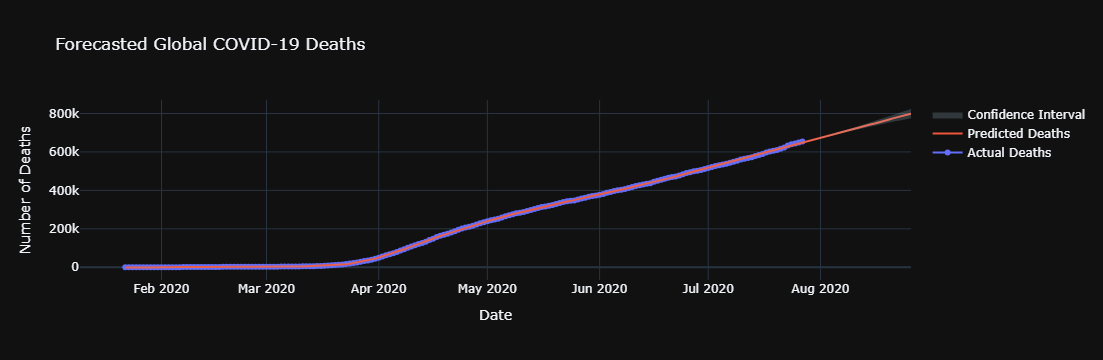

21:58:05 - cmdstanpy - INFO - Chain [1] start processing
21:58:05 - cmdstanpy - INFO - Chain [1] done processing


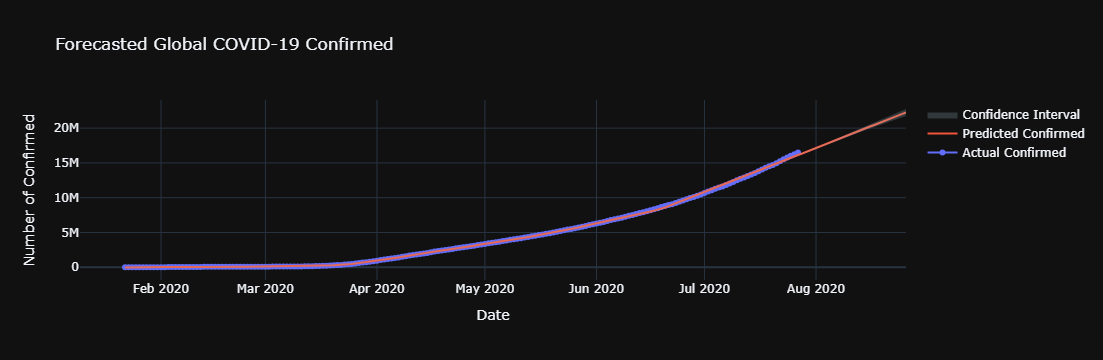

21:58:05 - cmdstanpy - INFO - Chain [1] start processing
21:58:06 - cmdstanpy - INFO - Chain [1] done processing


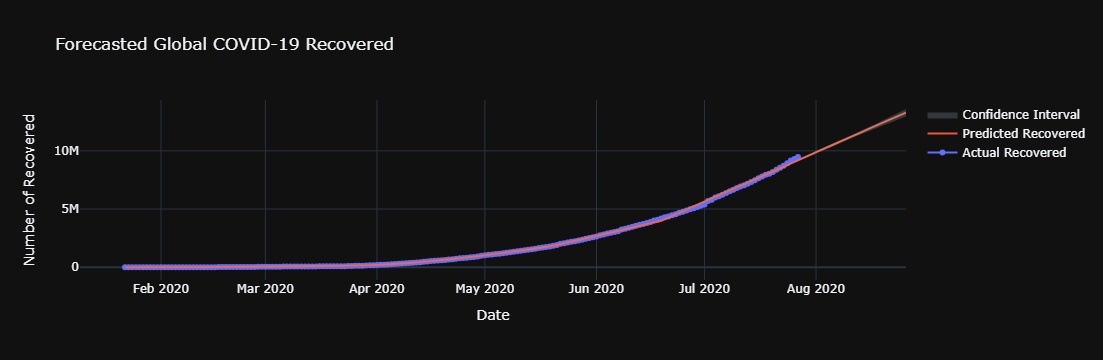

21:58:06 - cmdstanpy - INFO - Chain [1] start processing
21:58:06 - cmdstanpy - INFO - Chain [1] done processing


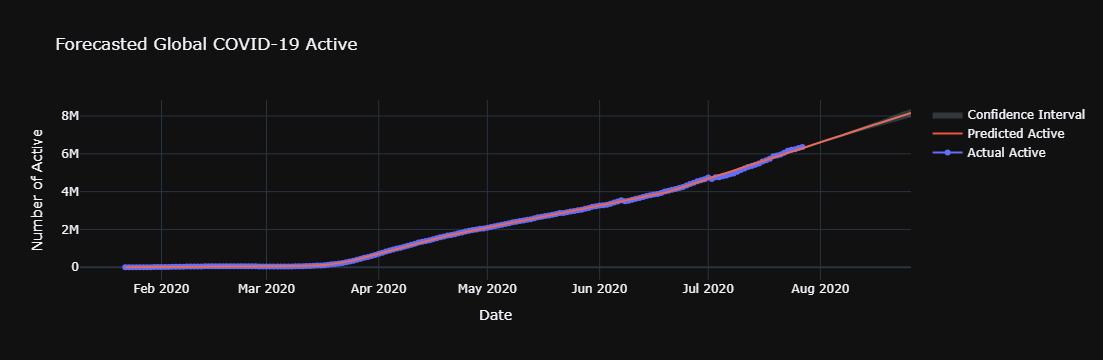

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22  3.938643e+02 -4.921564e+04  3.773089e+04  3.938643e+02   
1   2020-01-23  2.179133e+03 -4.691531e+04  4.439118e+04  2.179133e+03   
2   2020-01-24  3.964401e+03 -3.674194e+04  5.144528e+04  3.964401e+03   
3   2020-01-25  5.749669e+03 -3.914095e+04  5.363602e+04  5.749669e+03   
4   2020-01-26  7.534937e+03 -3.122646e+04  6.060148e+04  7.534937e+03   
..         ...           ...           ...           ...           ...   
213 2020-08-22  7.915387e+06  7.723705e+06  8.101090e+06  7.734787e+06   
214 2020-08-23  7.977640e+06  7.783210e+06  8.186767e+06  7.783612e+06   
215 2020-08-24  8.039893e+06  7.822268e+06  8.246569e+06  7.833236e+06   
216 2020-08-25  8.102145e+06  7.867018e+06  8.299961e+06  7.880720e+06   
217 2020-08-26  8.164398e+06  7.930807e+06  8.372202e+06  7.929054e+06   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    3.938643e+02    -5768.245001          -5768.245001          -5768.245001   
1    2.179133e+03    -2565.777101          -2565.777101          -2565.777101   
2    3.964401e+03     3219.382782           3219.382782           3219.382782   
3    5.749669e+03     3129.564761           3129.564761           3129.564761   
4    7.534937e+03     8182.557400           8182.557400           8182.557400   
..            ...             ...                   ...                   ...   
213  8.089472e+06     3129.564761           3129.564761           3129.564761   
214  8.163204e+06     8182.557399           8182.557399           8182.557399   
215  8.237584e+06     -334.830669           -334.830669           -334.830669   
216  8.309229e+06    -5862.652172          -5862.652172          -5862.652172   
217  8.384966e+06    -5768.245000          -5768.245000          -5768.245000   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -5768.245001  -5768.245001  -5768.245001                   0.0   
1   -2565.777101  -2565.777101  -2565.777101                   0.0   
2    3219.382782   3219.382782   3219.382782                   0.0   
3    3129.564761   3129.564761   3129.564761                   0.0   
4    8182.557400   8182.557400   8182.557400                   0.0   
..           ...           ...           ...                   ...   
213  3129.564761   3129.564761   3129.564761                   0.0   
214  8182.557399   8182.557399   8182.557399                   0.0   
215  -334.830669   -334.830669   -334.830669                   0.0   
216 -5862.652172  -5862.652172  -5862.652172                   0.0   
217 -5768.245000  -5768.245000  -5768.245000                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -5.374381e+03  
1                           0.0                         0.0 -3.866446e+02  
2                           0.0                         0.0  7.183784e+03  
3                           0.0                         0.0  8.879234e+03  
4                           0.0                         0.0  1.571749e+04  
..                          ...                         ...           ...  
213                         0.0                         0.0  7.918517e+06  
214                         0.0                         0.0  7.985822e+06  
215                         0.0                         0.0  8.039558e+06  
216                         0.0                         0.0  8.096283e+06  
217                         0.0                         0.0  8.158630e+06  

[218 rows x 16 columns]

In [84]:
# Global Forecasts
forecast_covid(df, column="Deaths", country=None, periods=30)
forecast_covid(df, column="Confirmed", country=None, periods=30)
forecast_covid(df, column="Recovered", country=None, periods=30)
forecast_covid(df, column="Active", country=None, periods=30)


21:58:32 - cmdstanpy - INFO - Chain [1] start processing
21:58:32 - cmdstanpy - INFO - Chain [1] done processing


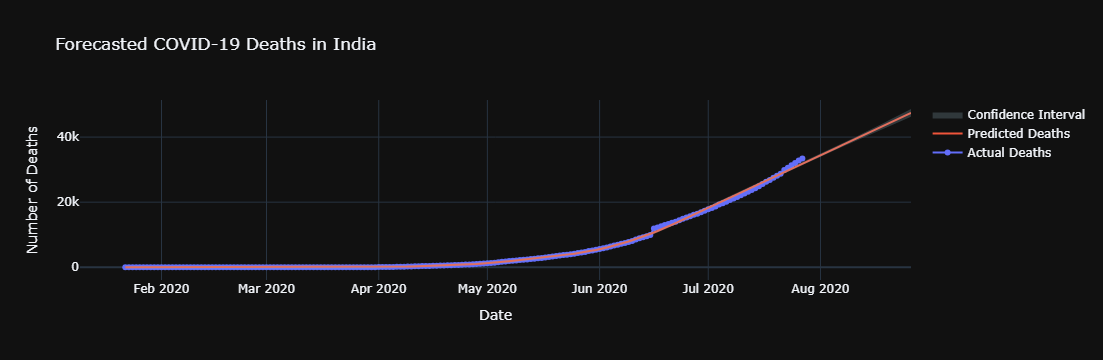

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22    -21.527948   -471.453163    443.554255    -21.527948   
1   2020-01-23    -20.836435   -475.766883    443.987522    -20.836435   
2   2020-01-24    -20.144921   -463.737224    468.576145    -20.144921   
3   2020-01-25    -19.453408   -452.209346    446.153031    -19.453408   
4   2020-01-26    -18.761894   -455.092431    403.090996    -18.761894   
..         ...           ...           ...           ...           ...   
213 2020-08-22  45320.124742  44338.849740  46370.298681  44451.519740   
214 2020-08-23  45840.387693  44755.600586  46945.629269  44915.882416   
215 2020-08-24  46360.650644  45246.973539  47488.330591  45381.165754   
216 2020-08-25  46880.913596  45701.195407  48026.579735  45849.824732   
217 2020-08-26  47401.176547  46225.207223  48629.263932  46310.087030   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0      -21.527948        2.140998              2.140998              2.140998   
1      -20.836435        1.664607              1.664607              1.664607   
2      -20.144921        6.902727              6.902727              6.902727   
3      -19.453408        6.224727              6.224727              6.224727   
4      -18.761894        2.316290              2.316290              2.316290   
..            ...             ...                   ...                   ...   
213  46226.645216        6.224727              6.224727              6.224727   
214  46792.609011        2.316290              2.316290              2.316290   
215  47366.488303       -8.323904             -8.323904             -8.323904   
216  47944.818790      -10.925446            -10.925446            -10.925446   
217  48516.429494        2.140998              2.140998              2.140998   

        weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0     2.140998      2.140998      2.140998                   0.0   
1     1.664607      1.664607      1.664607                   0.0   
2     6.902727      6.902727      6.902727                   0.0   
3     6.224727      6.224727      6.224727                   0.0   
4     2.316290      2.316290      2.316290                   0.0   
..         ...           ...           ...                   ...   
213   6.224727      6.224727      6.224727                   0.0   
214   2.316290      2.316290      2.316290                   0.0   
215  -8.323904     -8.323904     -8.323904                   0.0   
216 -10.925446    -10.925446    -10.925446                   0.0   
217   2.140998      2.140998      2.140998                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0    -19.386950  
1                           0.0                         0.0    -19.171828  
2                           0.0                         0.0    -13.242195  
3                           0.0                         0.0    -13.228681  
4                           0.0                         0.0    -16.445604  
..                          ...                         ...           ...  
213                         0.0                         0.0  45326.349469  
214                         0.0                         0.0  45842.703983  
215                         0.0                         0.0  46352.326741  
216                         0.0                         0.0  46869.988150  
217                         0.0                         0.0  47403.317545  

[218 rows x 16 columns]

In [85]:
# Forecast for One Country
forecast_covid(df, column="Deaths", country="India", periods=30)


21:59:08 - cmdstanpy - INFO - Chain [1] start processing
21:59:08 - cmdstanpy - INFO - Chain [1] done processing


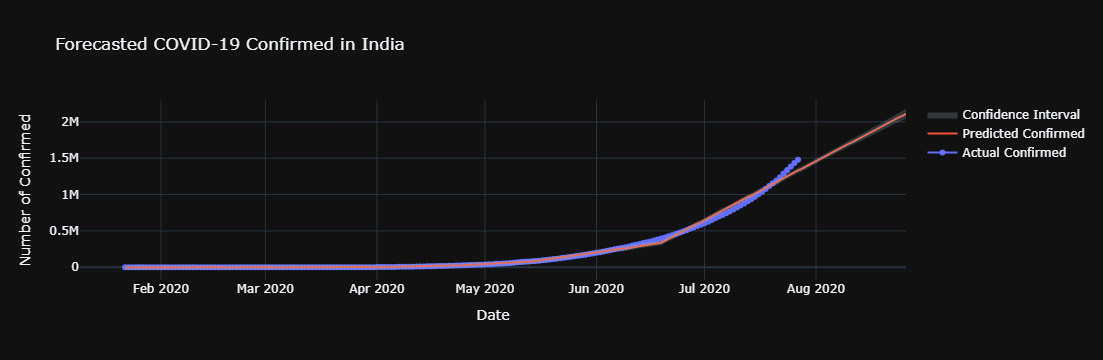

21:59:08 - cmdstanpy - INFO - Chain [1] start processing
21:59:08 - cmdstanpy - INFO - Chain [1] done processing


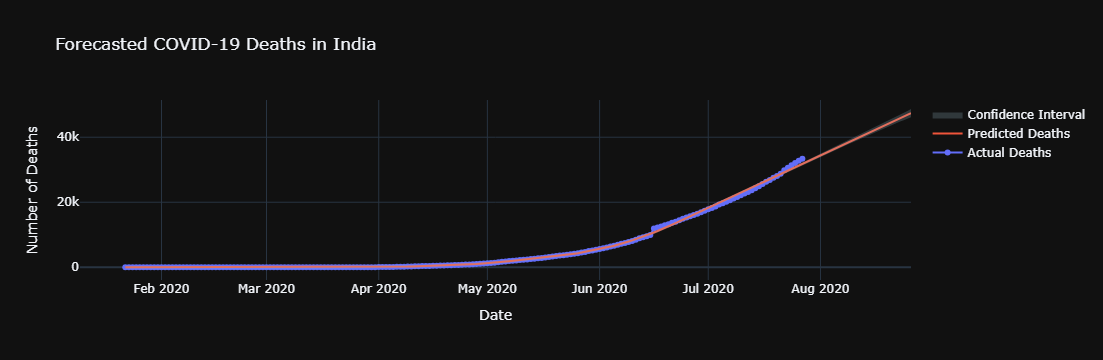

21:59:09 - cmdstanpy - INFO - Chain [1] start processing
21:59:09 - cmdstanpy - INFO - Chain [1] done processing


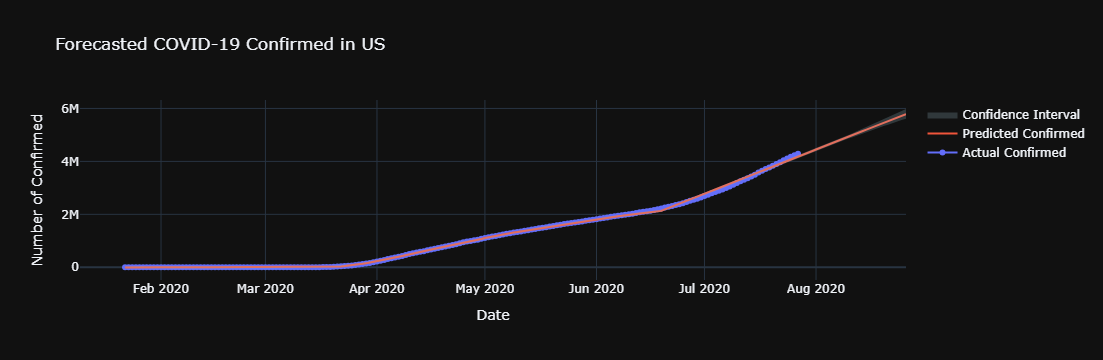

21:59:09 - cmdstanpy - INFO - Chain [1] start processing
21:59:09 - cmdstanpy - INFO - Chain [1] done processing


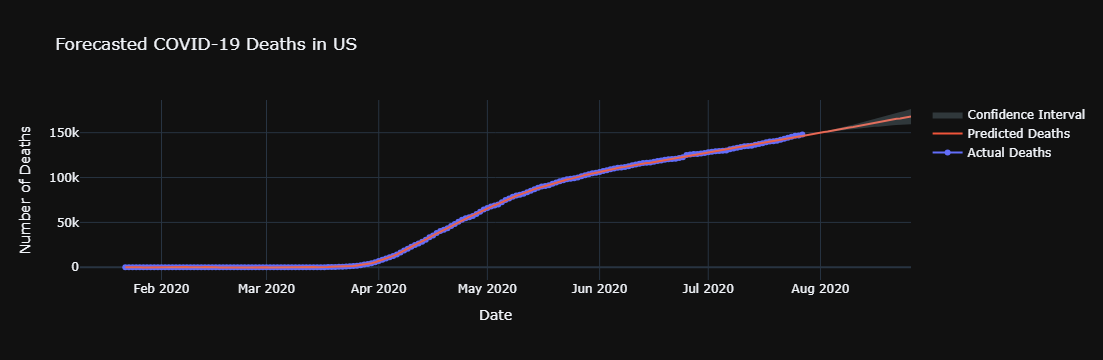

21:59:10 - cmdstanpy - INFO - Chain [1] start processing
21:59:10 - cmdstanpy - INFO - Chain [1] done processing


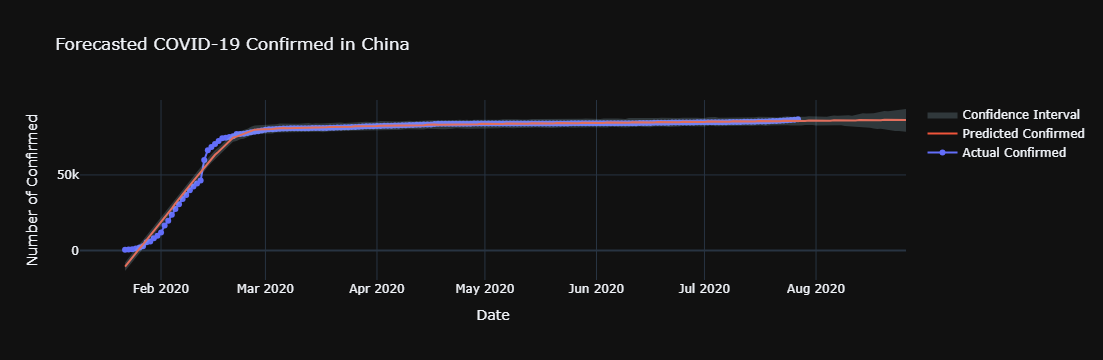

21:59:10 - cmdstanpy - INFO - Chain [1] start processing
21:59:10 - cmdstanpy - INFO - Chain [1] done processing


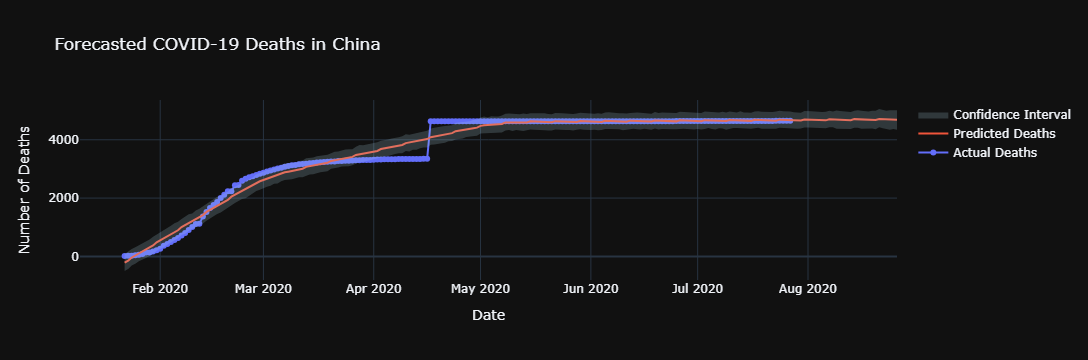

In [86]:
# Forecast for Multiple Countries
for c in ["India", "US", "China"]:
    forecast_covid(df, column="Confirmed", country=c, periods=30)
    forecast_covid(df, column="Deaths", country=c, periods=30)
